**Authol: Naval Vaidya**

This is an Image classification problem as part of the kaggle competition given below:
https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview

In [ ]:
# Importing the libraries

In [ ]:
import glob
import pandas as pd
import numpy as np
import os
from skimage import io
import matplotlib.pyplot as plt
from shutil import copyfile
import zipfile

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop

Defining the classes

In [ ]:
class_names = ['cat','dog']

#Mounting the drive where data is saved

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test = os.listdir('/content/drive/MyDrive/catvdog')

In [ ]:
root = '//content//catvdog//'

**Creating the folder structure required for the image data generator**

Here two folders are created with the class names. Labeled data is moved to its respective class folder

In [ ]:
import shutil

# root = 'catvdog'
if os.path.exists(root):
    shutil.rmtree(root)

os.makedirs(root+'/train1')
os.makedirs(root+'/train1/cat')
os.makedirs(root+'/train1/dog')

In [ ]:
train_zip = '/content/drive/MyDrive/catvdog (1)/train.zip'
zip_it   = zipfile.ZipFile(train_zip, 'r')
zip_it.extractall('/content/catvdog')
zip_it.close()

In [ ]:
file_path = os.listdir(os.path.join(root,'train'))

In [ ]:
target = ['cat' if 'cat' in image else 'dog' for image in file_path]

In [ ]:
df = pd.DataFrame({'filename':file_path,'target':target})

In [ ]:
train_cat = df[df['target']=='cat']['filename']
train_dog = df[df['target']=='dog']['filename']

In [ ]:
train_dog.shape

(12500,)

In [ ]:
print("Number of cat images for training:",len(train_cat))
print("Number of dog images for training:",len(train_dog))

# print("Number of images for testing:",len(test))

Number of cat images for training: 12500
Number of dog images for training: 12500


In [ ]:
train_path = os.path.join(root,'train')

Moving cat images to cat folder

In [ ]:
# Copying images to different folder for training
for filename in train_cat:
    shutil.copyfile(os.path.join(train_path,filename),os.path.join(root,'train1','cat',filename))


Moving Dog images to dog folder

In [ ]:
for filename in train_dog:
    shutil.copyfile(os.path.join(train_path,filename),os.path.join(root,'train1','dog',filename))

In [ ]:
len(os.listdir(os.path.join(root,'train1','dog')))

12500

In [ ]:
len(os.listdir(os.path.join(root,'train1','cat')))

12500

In [ ]:
sample_dog = glob.glob(os.path.join(root,'train1','dog','*.jpg'))

In [ ]:
sample_cat = glob.glob(os.path.join(root,'train1','cat','*.jpg'))

Sample from the dog folder

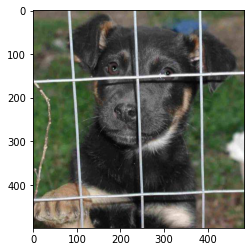

In [ ]:
image = io.imread(sample_dog[3])
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Sample from the cat folder

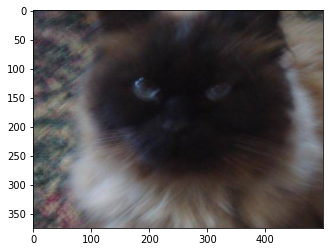

In [ ]:
image = io.imread(sample_cat[3])
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Using ImageDataGenerator to provide input to the model.


*   First each pixel is scaled(divide by 255) to get in range of 0 to 1
*   Various image augmentation are performed to help in the training process
*   A 20% validation split is created





In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2
                                   )

Target image is resized to 150*150

Train and Validation generators are used to provide input to the model

In [ ]:
root_train = os.path.join('catvdog','train1')
train_generator = train_datagen.flow_from_directory(root_train,
                                                    class_mode='binary',
                                                    batch_size=64,
                                                    target_size=(150,150),
                                                    subset='training'
                                                    # classes=['dog','cat']
                                                    )

Found 20000 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(root_train,
                                                         class_mode='binary',
                                                         batch_size=64,
                                                         target_size=(150,150),
                                                         subset='validation'
                                                        #  classes=['dog','cat']
                                                         )

Found 5000 images belonging to 2 classes.


**Model Training Process**

Xception model and transfer learning is used for the classification task of the cat and dog. Xception model is useing weights from the imagenet

* include_top is set to False as customized output layer is defined
* Activation function "Sigmoid" is used as binary classification is performed

In [ ]:
n_classes = 1
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="sigmoid")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

In [ ]:
# dataset_size = info.splits["train"].num_examples
dataset_size = 20000
batch_size = 64

Initially the pre-trained model layers are frozen and only output layer is trained with 5 epochs

After initial training various layers in the pretrained model are trained again

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_generator,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=validation_generator,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
234/234 [==============================] - 180s 710ms/step - loss: 0.3799 - accuracy: 0.9455 - val_loss: 0.2090 - val_accuracy: 0.9586
Epoch 2/5
234/234 [==============================] - 162s 691ms/step - loss: 0.1538 - accuracy: 0.9630 - val_loss: 0.1587 - val_accuracy: 0.9558
Epoch 3/5
234/234 [==============================] - 158s 673ms/step - loss: 0.1278 - accuracy: 0.9625 - val_loss: 0.1769 - val_accuracy: 0.9501
Epoch 4/5
234/234 [==============================] - 153s 656ms/step - loss: 0.1081 - accuracy: 0.9662 - val_loss: 0.1252 - val_accuracy: 0.9586
Epoch 5/5
234/234 [==============================] - 160s 685ms/step - loss: 0.0908 - accuracy: 0.9674 - val_loss: 0.1427 - val_accuracy: 0.9565


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_generator,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=validation_generator,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=25)

Epoch 1/25
234/234 [==============================] - 292s 1s/step - loss: 0.1255 - accuracy: 0.9497 - val_loss: 0.0723 - val_accuracy: 0.9738
Epoch 2/25
234/234 [==============================] - 281s 1s/step - loss: 0.0575 - accuracy: 0.9781 - val_loss: 0.0662 - val_accuracy: 0.9755
Epoch 3/25
234/234 [==============================] - 281s 1s/step - loss: 0.0370 - accuracy: 0.9861 - val_loss: 0.0634 - val_accuracy: 0.9766
Epoch 4/25
234/234 [==============================] - 282s 1s/step - loss: 0.0262 - accuracy: 0.9908 - val_loss: 0.0694 - val_accuracy: 0.9772
Epoch 5/25
234/234 [==============================] - 279s 1s/step - loss: 0.0193 - accuracy: 0.9929 - val_loss: 0.0712 - val_accuracy: 0.9762
Epoch 6/25
234/234 [==============================] - 277s 1s/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0474 - val_accuracy: 0.9823
Epoch 7/25
234/234 [==============================] - 280s 1s/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0538 - val_accuracy: 0.9789

**Saving the model for usage in future**

In [ ]:
model.save_weights('//content//sample_data//model_catvdog_wtransfer')
model.save('//content//sample_data//model_catvdogtransfer')

model.save_weights('//content//drive//MyDrive//catvdog//model_catvdog_wtransfer')
model.save('//content//drive//MyDrive//catvdog//model_catvdogtransfer')

INFO:tensorflow:Assets written to: //content//sample_data//model_catvdogtransfer/assets
INFO:tensorflow:Assets written to: //content//drive//MyDrive//catvdog//model_catvdogtransfer/assets


**Loading the saved model**

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/catvdog/model_catvdogtransfer')

**Testing the model on new images**

In [ ]:
test_zip = '/content/drive/MyDrive/catvdog (1)/test.zip'
zip_it   = zipfile.ZipFile(test_zip, 'r')
zip_it.extractall('/content/catvdog/test_data')
zip_it.close()

In [ ]:
root_test = os.path.join('catvdog','test_data')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(root_test,
                                                  class_mode=None,
                                                  batch_size=64,
                                                  # color_mode="rgb",
                                                  target_size=(150,150),
                                                  shuffle=False)

Found 12500 images belonging to 1 classes.


In [ ]:
test_generator.reset()

In [ ]:
step_size = len(os.listdir(os.path.join(root_test,'test')))/batch_size

In [ ]:
y_pred = model.predict_generator(test_generator,verbose=1,steps=step_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


195/195 [==============================] - 68s 298ms/step


In [ ]:
len(y_pred)

12500

In [ ]:
pred_label = [(pred[0]) for pred in y_pred]

In [ ]:
len(test_generator.filenames)

12500

In [ ]:
pflie = [int(test_generator.filenames[i][5:].split('.')[0]) for i in range(0,len(pred_label))]

In [ ]:
df_pred = pd.DataFrame({'id':pflie,'label':pred_label})
df_pred

,id,label
0,1,9.999999e-01
1,10,6.944187e-06
2,100,6.993531e-09
3,1000,9.999999e-01
4,10000,9.999998e-01
...,...,...
12495,9995,7.620825e-06
12496,9996,9.992996e-01
12497,9997,9.999995e-01
12498,9998,1.507226e-07


In [ ]:
df_pred.to_csv('CatVsDogResults_NavalVaidya.csv',index=False)